In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import font_manager

font_dir = ['/Users/henry/Downloads/GTAmerica Font']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

font_dir = ['/Users/henry/Downloads/Century Schoolbook Font']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

In [8]:
plt.rcParams['font.family'] = 'GT America'

In [3]:
plt.rcParams['font.family'] = 'Century Schoolbook'

## Processing Budget Data

In [4]:
df = pd.read_csv('fy23-adopted-operating-budget.csv')
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all')
df = df.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1)

# edit column name to make it make sense
df.rename(columns = {'Program   ':'Program'}, inplace = True)

# get rid of commas
df['FY20 Actual Expense']=df['FY20 Actual Expense'].str.replace(',','')
df['FY21 Actual Expense']=df['FY21 Actual Expense'].str.replace(',','')
df['FY22 Appropriation'] = df['FY22 Appropriation'].str.replace(',','')
df['FY23 Adopted'] = df['FY23 Adopted'].str.replace(',','')

# change str to floats
df['FY20 Actual Expense'] = df['FY20 Actual Expense'].replace(['#Missing'],[0]).astype(float)
df['FY21 Actual Expense'] = df['FY21 Actual Expense'].replace(['#Missing'],[0]).astype(float)
df['FY22 Appropriation'] = df['FY22 Appropriation'].replace(['#Missing'],[0]).astype(float)
df['FY23 Adopted'] = df['FY23 Adopted'].replace(['#Missing'],[0]).astype(float)

In [5]:
# budget per department
dept_df = df.groupby(['Dept'], as_index=False).sum(numeric_only=True)

## Total BPD Budget vs. previous year

In [6]:
bpd_budget = {
    'FY16\n(Actual Expense)': [348887844 - 57479518, 348887844 - 57479518 + 37359246, 348887844],
    'FY17\n(Actual Expense)': [364594820 - 60315934, 364594820 - 60315934 + 55660719, 364594820],
    'FY18\n(Actual Expense)': [399924493 - 67908633 , 399924493 - 67908633 + 58333769, 399924493],
    'FY19\n(Actual Expense)': [416762373 - 69759822, 416762373 - 69759822 + 59375258, 416762373],
    'FY20\n(Actual Expense)': [425553210 - 74694594, 425553210 - 74694594 + 60803585, 425553210],
    'FY21\n(Actual Expense)': [422917499 - 68218769, 422917499 - 68218769 + 48803585, 422917499],
    'FY22\n(Appropriation)': [400451303 - 43923226, 400451303 - 43923226 + 43923226, 400451303],
    'FY23\n(Adopted)': [395094796 - 43923226, 395094796 - 43923226 + 43923226, 395094796],
}
pd_only = pd.DataFrame(data = bpd_budget)

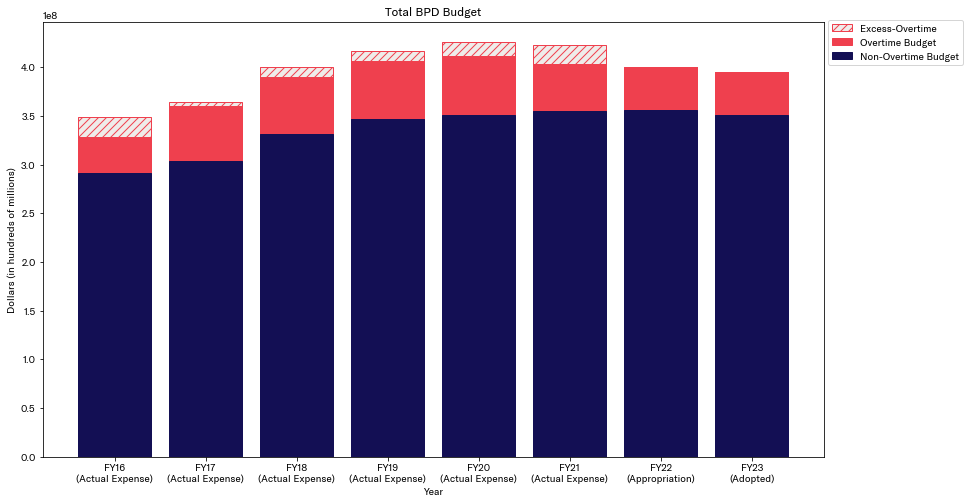

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

ax.bar(pd_only.columns.values, pd_only.values[2], color='#EFECEA', edgecolor='#EF404E', hatch='///', label='Excess-Overtime')
ax.bar(pd_only.columns.values, pd_only.values[1], color='#EF404E', edgecolor='#EF404E',label='Overtime Budget')
ax.bar(pd_only.columns.values, pd_only.values[0], color='#130F54', edgecolor='#130F54',label='Non-Overtime Budget')

plt.title('Total BPD Budget')
plt.xlabel('Year')
plt.ylabel('Dollars (in hundreds of millions)')
leg = ax.legend(loc=(1.005, .9));
fig.savefig('Total_BPD_Budget.png', bbox_inches='tight')

In [10]:
total_budget = {
    'FY16\n(Actual Expense)': [2860000000],
    'FY17\n(Actual Expense)': [2980000000],
    'FY18\n(Actual Expense)': [3150000000],
    'FY19\n(Actual Expense)': [3290000000],
    'FY20\n(Actual Expense)': [3490000000],
    'FY21\n(Actual Expense)': [3610000000],
    'FY22\n(Appropriation)': [3760000000],
    'FY23\n(Adopted)': [3990000000], 
}
df_total = pd.DataFrame(data = total_budget)
pd_prop = pd_only.div(df_total.iloc[0], axis='columns')

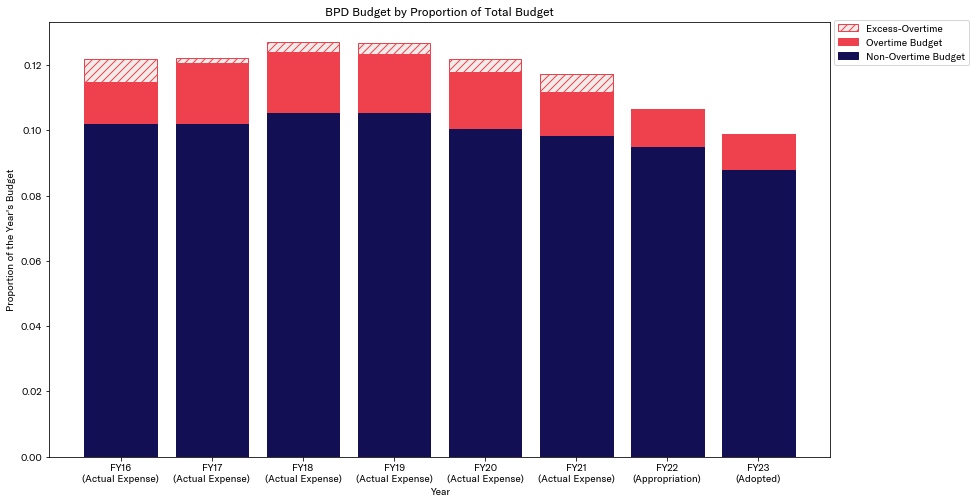

In [11]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

ax.bar(pd_only.columns.values, pd_prop.values[2], color='#EFECEA', edgecolor='#EF404E', hatch='///', label='Excess-Overtime')
ax.bar(pd_only.columns.values, pd_prop.values[1], color='#EF404E', edgecolor='#EF404E',label='Overtime Budget')
ax.bar(pd_only.columns.values, pd_prop.values[0], color='#130F54', edgecolor='#130F54',label='Non-Overtime Budget')

plt.title('BPD Budget by Proportion of Total Budget')
plt.xlabel('Year')
plt.ylabel('Proportion of the Year\'s Budget')
leg = ax.legend(loc=(1.005, .9));
plt.savefig('Prop_BPD_Budget.png', bbox_inches='tight')
plt.show()

## BPD Budget vs. other departments budgets + change over time

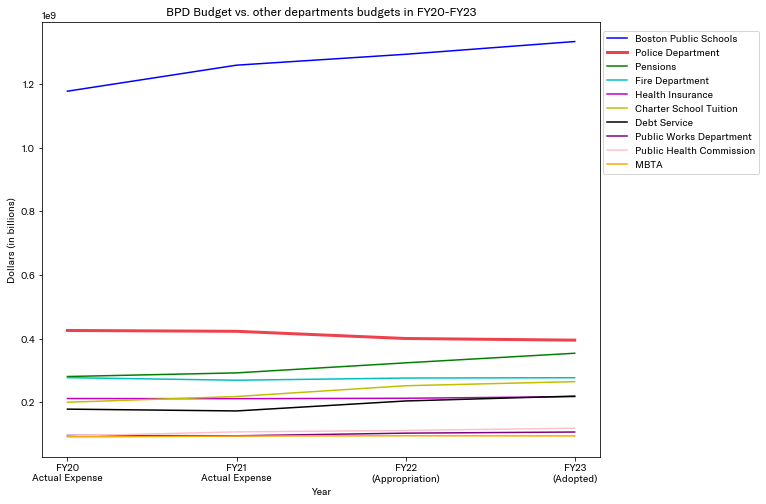

In [12]:
x = dept_df.nlargest(10, 'FY20 Actual Expense')

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
colors = ['b', 'g', 'c', 'm', 'y', 'k', 'purple', 'pink', 'orange']

loop = 0
for dept in x['Dept']:
    if dept == 'Police Department':
        ax.plot(['FY20\nActual Expense', 'FY21\nActual Expense', 'FY22\n(Appropriation)', 'FY23\n(Adopted)'], 
                x.loc[x['Dept'] == dept][['FY20 Actual Expense', 'FY21 Actual Expense', 'FY22 Appropriation', 'FY23 Adopted']].values[0],
                color='#EF404E',
                linewidth=3,
                label=dept)
    else:
        ax.plot(['FY20\nActual Expense', 'FY21\nActual Expense', 'FY22\n(Appropriation)', 'FY23\n(Adopted)'], 
                x.loc[x['Dept'] == dept][['FY20 Actual Expense', 'FY21 Actual Expense', 'FY22 Appropriation', 'FY23 Adopted']].values[0],
                color=colors[loop],
                linewidth=1.5,
                label=dept)
        loop += 1
    
plt.title('BPD Budget vs. other departments budgets in FY20-FY23')
plt.xlabel('Year')
plt.ylabel('Dollars (in billions)')
leg = ax.legend(loc=(1.005, .65));
fig.savefig('BPD_Budget_vs_others.png', bbox_inches='tight')

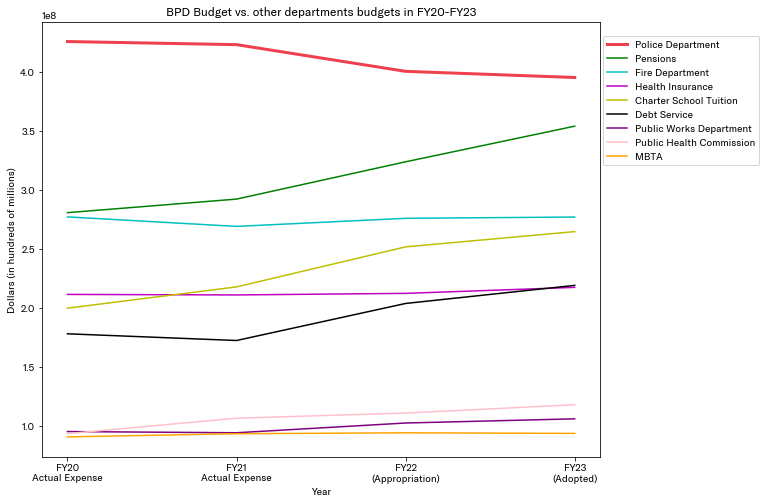

In [13]:
x = dept_df.nlargest(10, 'FY20 Actual Expense')

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
colors = ['b', 'g', 'c', 'm', 'y', 'k', 'purple', 'pink', 'orange']

loop = 0
for dept in x['Dept']:
    if dept == 'Police Department':
        ax.plot(['FY20\nActual Expense', 'FY21\nActual Expense', 'FY22\n(Appropriation)', 'FY23\n(Adopted)'], 
                x.loc[x['Dept'] == dept][['FY20 Actual Expense', 'FY21 Actual Expense', 'FY22 Appropriation', 'FY23 Adopted']].values[0],
                color='#EF404E',
                linewidth=3,
                label=dept)
    elif dept == 'Boston Public Schools':
        loop += 1
    else:
        ax.plot(['FY20\nActual Expense', 'FY21\nActual Expense', 'FY22\n(Appropriation)', 'FY23\n(Adopted)'], 
                x.loc[x['Dept'] == dept][['FY20 Actual Expense', 'FY21 Actual Expense', 'FY22 Appropriation', 'FY23 Adopted']].values[0],
                color=colors[loop],
                linewidth=1.5,
                label=dept)
        loop += 1
    
plt.title('BPD Budget vs. other departments budgets in FY20-FY23')
plt.xlabel('Year')
plt.ylabel('Dollars (in hundreds of millions)')
leg = ax.legend(loc=(1.005, .67));
fig.savefig('BPD_Budget_vs_others_noBPS.png', bbox_inches='tight')

## BPD Budget spend categories + change over time

In [14]:
cat = {
    'Expense Category': ['Personnel Services',  'Total Overtime', 'Contractual Services ', 'Supplies & Materials', 
                          'Current Charges & Obligations', 'Equipment'],
    'FY16\n(Actual Expense)': [252129141, 67479518, 11288032, 7214170, 4712823, 6064160],
    'FY17\n(Actual Expense)': [271841632, 60315934, 12921206, 7174838, 5141198, 7200012],
    'FY18\n(Actual Expense)': [289547463, 67908633, 13514191, 7608535, 5414289, 15931382],
    'FY19\n(Actual Expense)': [301776319, 69759822, 15714871, 7520038, 6027603, 15963720],
    'FY20\n(Actual Expense)': [310202398, 74694594, 20657551, 8437198, 5450466, 6111001],
    'FY21\n(Actual Expense)': [308557553, 68218769, 20879094, 6877106, 7870088, 10514888],
    'FY22\n(Appropriation)': [316757906, 43923226, 20955246, 7661121, 5281135, 5872670],
    'FY23\n(Adopted)': [305891131, 43923226, 24853867, 8792829, 5529868, 6103875],
}
df_pd_cat = pd.DataFrame(data = cat)
df_pd_cat2 = df_pd_cat.drop(columns = {'Expense Category'})

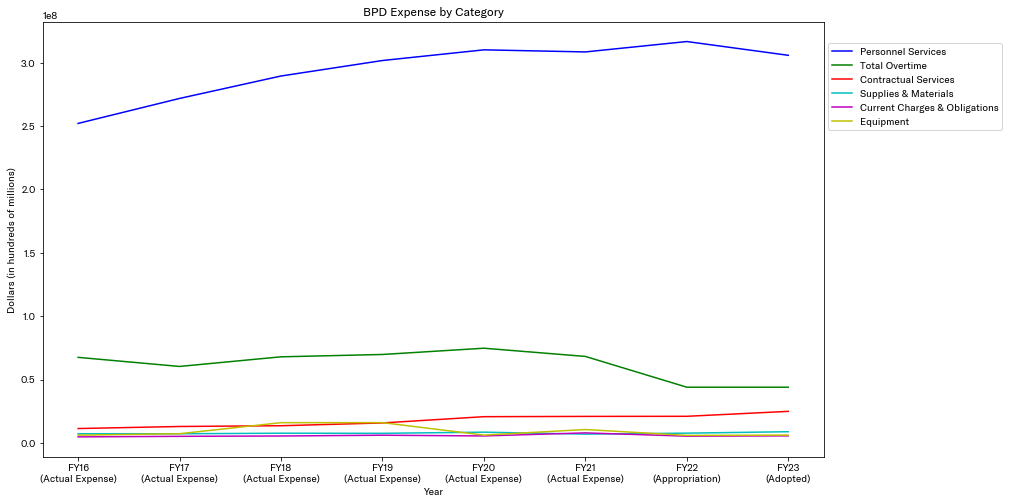

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)
colors = [x for x in 'bgrcmyk']

loop = 0
for x in df_pd_cat['Expense Category']:
    ax.plot(df_pd_cat2.columns.values, 
            df_pd_cat2.values[loop], 
            color=colors[loop], 
            label=x)
    loop += 1

plt.title('BPD Expense by Category')
plt.xlabel('Year')
plt.ylabel('Dollars (in hundreds of millions)')
leg = ax.legend(loc=(1.005, .75));
fig.savefig('PD_Expenses.png', bbox_inches='tight')

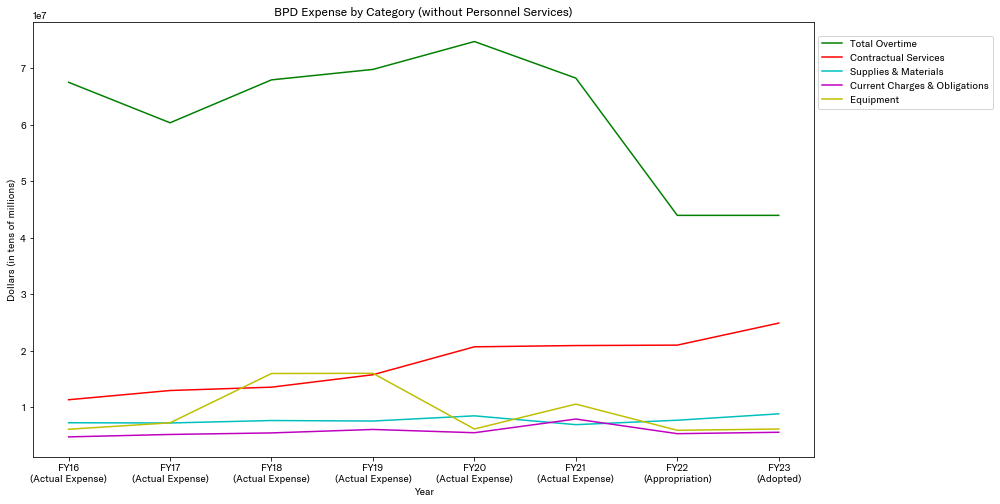

In [16]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)
colors = [x for x in 'bgrcmyk']

loop = 0
for x in df_pd_cat['Expense Category']:
    if x == 'Personnel Services':
        loop += 1
        continue
    ax.plot(df_pd_cat2.columns.values, 
            df_pd_cat2.values[loop], 
            color=colors[loop], 
            label=x)
    loop += 1

plt.title('BPD Expense by Category (without Personnel Services)')
plt.xlabel('Year')
plt.ylabel('Dollars (in tens of millions)')
leg = ax.legend(loc=(1.005, .8));
fig.savefig('PD_Expenses_noPS.png', bbox_inches='tight')

## BPD Budget Program categories + change over time

In [17]:
program = {
    'Program': ['Police Commissioner\'s Office', 'Bureau of Community Engagement', 'BAT-Operations',
                'BAT-Admin & Technology', 'Bureau of Professional Development', 'Bureau of Field Services',
                'Bureau of Professional Standards', 'Bureau of Investigative Services', 'Bureau of Intelligence & Analysis'],
    'FY16\n(Actual Expense)': [8621069, 0, 19483314, 45643618, 8056091, 185672652, 8465414, 69615348, 3330338],
    'FY17\n(Actual Expense)': [9246592, 0, 20630072, 49337563, 8650342, 193457518, 8824485, 71017514, 3430734],
    'FY18\n(Actual Expense)': [9564492, 0, 28555129, 55559827, 12383678, 204443017, 9214855, 76454988, 3748507],
    'FY19\n(Actual Expense)': [9148894, 0, 28134822, 58322837, 14970510, 214602984, 9190977, 78720941, 3670408],
    'FY20\n(Actual Expense)': [9858591, 4248149, 12824053, 77298756, 20293727, 202164885, 6325894 , 87232672, 5306484],
    'FY21\n(Actual Expense)': [15882950, 4085308, 21659482, 84263703, 6521388, 198211460, 5583491, 82149151, 4560566],
    'FY22\n(Appropriation)': [13986246, 4221119, 19276943, 81536319 , 5843281, 192750473, 4716480, 74485472, 3634970],
    'FY23\n(Adopted)': [13360258, 4272892, 20057764, 82080040, 6248510, 189992141, 4434463, 71067305, 3581423],
}
df_pd_pro = pd.DataFrame(data = program)
df_pd_pro2 = df_pd_pro.drop(columns = {'Program'})

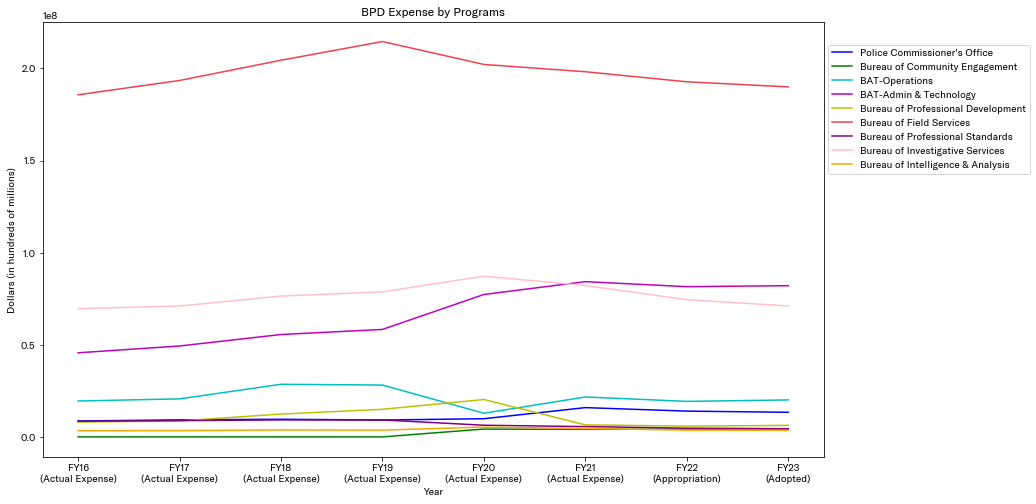

In [18]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)
colors = ['b', 'g', 'c', 'm', 'y', '#EF404E', 'purple', 'pink', 'orange']

loop = 0
for x in df_pd_pro['Program']:
    ax.plot(df_pd_pro2.columns.values, 
            df_pd_pro2.values[loop], 
            color=colors[loop], 
            label=x)
    loop += 1

plt.title('BPD Expense by Programs')
plt.xlabel('Year')
plt.ylabel('Dollars (in hundreds of millions)')
leg = ax.legend(loc=(1.005, .65));
fig.savefig('PD_Programs.png', bbox_inches='tight')

## BPD Adopted vs Appropriated budget

In [21]:
# 2021: proposes 414,182,025 / appropriated 404,180,000
# 2022: proposes 399.87 mil / appropriated 400.306 mil
# 2023: adopted 395.095 mil

years = ['FY' + str(x) for x in range(16,24)]
spent = [348887844, 364594820, 399924493, 416762373, 425553210, 422917499]
appropriated = [323509388, 356341193, 373814105, 400425675, 414237376, 404182025, 400451303]
adopted = [332544971, 364321048, 385562872, 400435574, 414306876, 404182025, 399871218, 395094796]
proposed = [414182025, 399870000]

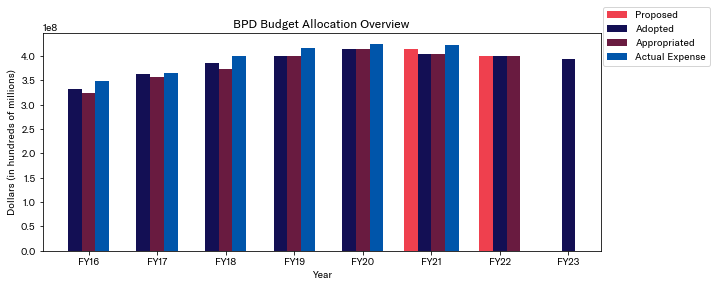

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))
x = np.arange(8)
bar_width = 0.2

# FY16-20
ax.bar(x[:5] - bar_width / 2, adopted[:5], width=bar_width, color = '#130F54')
ax.bar(x[:5] + bar_width / 2, appropriated[:5], width=bar_width, color = '#691B40')
ax.bar(x[:5] + 3 * bar_width / 2, spent[:5], width=bar_width, color = '#0055AA')

# FY21
ax.bar(x[5] - bar_width, proposed[0], width=bar_width, color = '#EF404E', label='Proposed')
ax.bar(x[5], adopted[5], width=bar_width, color = '#130F54', label='Adopted')
ax.bar(x[5] + bar_width, appropriated[5], width=bar_width, color = '#691B40', label='Appropriated')
ax.bar(x[5] + 2 * bar_width, spent[5], width=bar_width, color = '#0055AA', label='Actual Expense')

# FY22
ax.bar(x[6] - bar_width / 2, proposed[1], width=bar_width, color = '#EF404E')
ax.bar(x[6] + bar_width / 2, adopted[6], width=bar_width, color = '#130F54')
ax.bar(x[6] + 3 * bar_width / 2, appropriated[6], width=bar_width, color = '#691B40')

# FY23
ax.bar(x[7] + bar_width / 2, adopted[7], width=bar_width, color = '#130F54')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(years)
plt.title('BPD Budget Allocation Overview')
plt.xlabel('Year')
plt.ylabel('Dollars (in hundreds of millions)')
leg = ax.legend(loc=(1.005, .85));
fig.savefig('PD_AvsA.png', bbox_inches='tight')
plt.show()